In [1]:
import pandas as pd
import numpy as np

# Define o número de produtos
num_produtos = 600
produtos = {
    "produto_id": range(1, num_produtos + 1),
    "nome": [f"Produto {i}" for i in range(1, num_produtos + 1)],
    "categoria": np.random.choice(["Eletrônicos", "Roupas", "Alimentos"], num_produtos),
}

# Cria um DataFrame com os produtos 
df_produtos = pd.DataFrame(produtos)

# Define o número de vendas    
num_vendas = 1000  # Número de vendas
data_vendas = {
    "data": np.random.choice(pd.date_range("2024-04-01", periods=30), num_vendas),  # Data da venda
    "produto_id": np.random.randint(1, num_produtos + 1, num_vendas),
    "quantidade": np.random.randint(50, 500, num_vendas),  # Quantidade vendida
    "valor_total": np.random.randint(1000, 10000, num_vendas),  # Valor total da venda
}

# Cria um DataFrame com as vendas
df_vendas = pd.DataFrame(data_vendas)

# Salva os DataFrames em arquivos CSV
df_vendas.to_csv("vendas.csv", index=False)
df_produtos.to_csv("produtos.csv", index=False)

# Lê os arquivos CSV
df_vendas = pd.read_csv("vendas.csv")
df_produtos = pd.read_csv("produtos.csv")

# Faz o merge dos DataFrames
df_merge = pd.merge(df_vendas, df_produtos, on="produto_id", how="inner")

# Salva o DataFrame merge em um arquivo CSV
df_merge.to_csv("data_warehouse.csv", index=False)
 
# Exibe o conteúdo do arquivo data_warehouse.csv
df_warehouse = pd.read_csv("data_warehouse.csv")
print("Conteúdo do data_warehouse.csv")
print(df_warehouse)

Conteúdo do data_warehouse.csv
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-19         187         279         1281  Produto 187       Roupas
1    2024-04-21         394         102         7440  Produto 394    Alimentos
2    2024-04-27         394         181         2885  Produto 394    Alimentos
3    2024-04-12          73         490         8796   Produto 73    Alimentos
4    2024-04-13          73         435         7087   Produto 73    Alimentos
..          ...         ...         ...          ...          ...          ...
995  2024-04-23         460         263         7734  Produto 460       Roupas
996  2024-04-04         334          62         1401  Produto 334    Alimentos
997  2024-04-30          28         238         9943   Produto 28  Eletrônicos
998  2024-04-16          41         139         4313   Produto 41    Alimentos
999  2024-04-15         386         120         8989  Produto 386  Eletrônicos

[1000 rows x 6 colum

Análise de vendas por produto
             quantidade  valor_total
nome                                
Produto 1          1153        14589
Produto 10          540         8538
Produto 101         455        12898
Produto 102         637        12065
Produto 104         418         7724
...                 ...          ...
Produto 95          794        21090
Produto 96          354         7830
Produto 97         1084        20171
Produto 98          595         4480
Produto 99          317         8020

[497 rows x 2 columns]
Análise de vendas por categoria
             quantidade  valor_total
categoria                           
Alimentos         99939      2071241
Eletrônicos       82882      1544751
Roupas            89336      1789048
Análise de tendência de vendas por data
            quantidade  valor_total
data                               
2024-04-01        7642       152586
2024-04-02        8186       164057
2024-04-03        8690       183960
2024-04-04        8728      

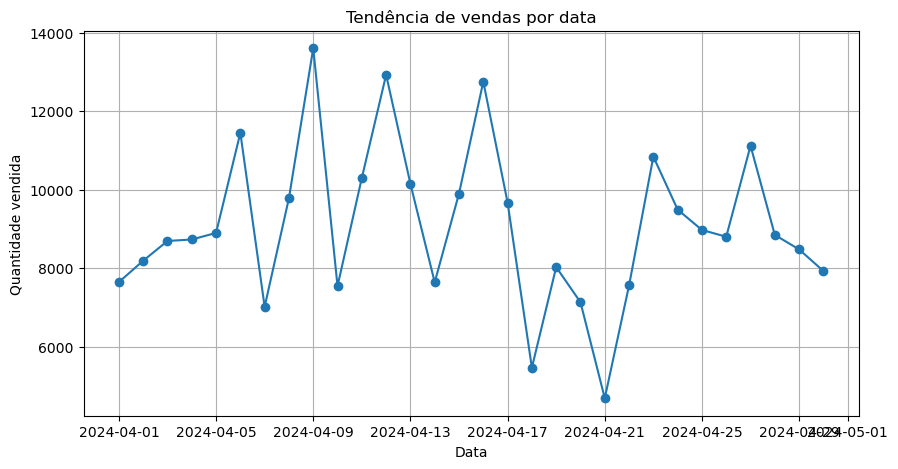

Desempenho de vendas por produto
nome
Produto 1      14589
Produto 10      8538
Produto 101    12898
Produto 102    12065
Produto 104     7724
               ...  
Produto 95     21090
Produto 96      7830
Produto 97     20171
Produto 98      4480
Produto 99      8020
Name: valor_total, Length: 497, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo data_warehouse.csv
df_warehouse = pd.read_csv("data_warehouse.csv")

# Análise de vendas por produto
vendas_por_produto = df_warehouse.groupby("nome")[["quantidade", "valor_total"]].sum()
print("Análise de vendas por produto")
print(vendas_por_produto)

# Análise de vendas por categoria
vendas_por_categoria = df_warehouse.groupby("categoria")[
    ["quantidade", "valor_total"]
].sum()
print("Análise de vendas por categoria")
print(vendas_por_categoria)

# Análise de tendência de vendas por data
df_warehouse["data"] = pd.to_datetime(df_warehouse["data"])
vendas_por_data = df_warehouse.groupby("data")[["quantidade", "valor_total"]].sum()
print("Análise de tendência de vendas por data")
print(vendas_por_data)

# Plota o gráfico de tendência de vendas por data
plt.figure(figsize=(10, 5))
plt.plot(
    vendas_por_data.index, vendas_por_data["quantidade"], marker="o", linestyle="-"
)
plt.title("Tendência de vendas por data")
plt.xlabel("Data")
plt.ylabel("Quantidade vendida")
plt.grid(True)
plt.show()

# Análise de desempenho de vendas por produto
desempenho_produto = df_warehouse.groupby("nome")["valor_total"].sum()
print("Desempenho de vendas por produto")
print(desempenho_produto)